In [171]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../Classes')

import Clustering
import MolecularDynamics
import Potentials

from importlib import reload
reload(Clustering)
reload(MolecularDynamics)
reload(Potentials)
#reload(Optimisation)
from Clustering import PairDistances, KMeans
from MolecularDynamics   import *
from Potentials import *

from matplotlib.animation import FuncAnimation




(100, 12, 2)


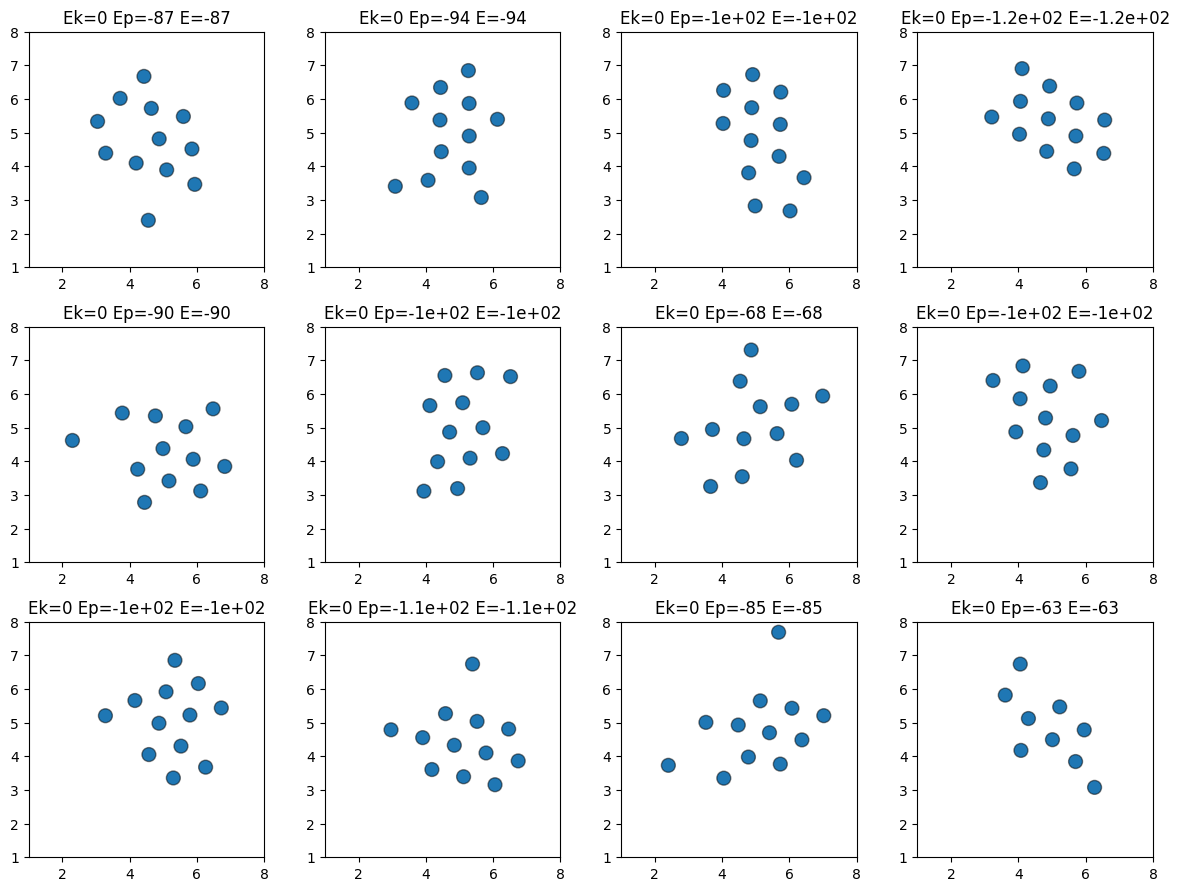

In [172]:
pos = np.loadtxt('ljg12clusters.txt')
positions = pos.reshape(-1,12, 2)

print(positions.shape)


fig, axs = plt.subplots(3,4, figsize = (12,9))

axs = axs.flatten()
for i, ax in enumerate(axs):
    cluster = AtomicCluster(calc = LennardJones(), pos = positions[i])
    cluster.draw(ax)
    ax.set(xlim = (1,8), ylim=(1,8), aspect='equal')
    

fig.tight_layout()


In [173]:
PD = PairDistances(descriptor_type='global')

print(PD.descriptor(positions[0]))


PD.type = 'local'


local_desc = PD.descriptor(positions[0])
for desc in local_desc:
    print(desc)

[ 0 15  2 24  4 13  5  2  1  0  0  0  0  0]
[1 3 0 4 1 2 1 0 0 0 0 0 0 0]
[1 2 2 2 1 4 0 0 0 0 0 0 0 0]
[1 3 0 4 0 2 1 1 0 0 0 0 0 0]
[1 2 0 3 0 4 0 1 1 0 0 0 0 0]
[1 0 0 3 3 0 3 1 1 0 0 0 0 0]
[1 1 1 3 1 2 2 1 0 0 0 0 0 0]
[1 2 0 4 1 4 0 0 0 0 0 0 0 0]
[1 2 0 4 0 3 2 0 0 0 0 0 0 0]
[1 4 0 5 0 1 1 0 0 0 0 0 0 0]
[1 4 0 4 0 3 0 0 0 0 0 0 0 0]
[1 4 1 5 1 0 0 0 0 0 0 0 0 0]
[1 3 0 7 0 1 0 0 0 0 0 0 0 0]


In [174]:
vector1 = np.array([[0,1], [1,0]]) 

vector2 = np.array([0,1]) 

vector3 = np.vstack((vector1, vector2))    


print(vector3)
    
    

[[0 1]
 [1 0]
 [0 1]]


In [175]:
local_desc = PD.descriptor(positions[0])

print(local_desc)


[array([1, 3, 0, 4, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64), array([1, 2, 2, 2, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64), array([1, 3, 0, 4, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64), array([1, 2, 0, 3, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64), array([1, 0, 0, 3, 3, 0, 3, 1, 1, 0, 0, 0, 0, 0], dtype=int64), array([1, 1, 1, 3, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0], dtype=int64), array([1, 2, 0, 4, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64), array([1, 2, 0, 4, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int64), array([1, 4, 0, 5, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64), array([1, 4, 0, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64), array([1, 4, 1, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64), array([1, 3, 0, 7, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)]


In [176]:
new_array = np.vstack((local_desc, local_desc))

print(new_array)



[[1 3 0 4 1 2 1 0 0 0 0 0 0 0]
 [1 2 2 2 1 4 0 0 0 0 0 0 0 0]
 [1 3 0 4 0 2 1 1 0 0 0 0 0 0]
 [1 2 0 3 0 4 0 1 1 0 0 0 0 0]
 [1 0 0 3 3 0 3 1 1 0 0 0 0 0]
 [1 1 1 3 1 2 2 1 0 0 0 0 0 0]
 [1 2 0 4 1 4 0 0 0 0 0 0 0 0]
 [1 2 0 4 0 3 2 0 0 0 0 0 0 0]
 [1 4 0 5 0 1 1 0 0 0 0 0 0 0]
 [1 4 0 4 0 3 0 0 0 0 0 0 0 0]
 [1 4 1 5 1 0 0 0 0 0 0 0 0 0]
 [1 3 0 7 0 1 0 0 0 0 0 0 0 0]
 [1 3 0 4 1 2 1 0 0 0 0 0 0 0]
 [1 2 2 2 1 4 0 0 0 0 0 0 0 0]
 [1 3 0 4 0 2 1 1 0 0 0 0 0 0]
 [1 2 0 3 0 4 0 1 1 0 0 0 0 0]
 [1 0 0 3 3 0 3 1 1 0 0 0 0 0]
 [1 1 1 3 1 2 2 1 0 0 0 0 0 0]
 [1 2 0 4 1 4 0 0 0 0 0 0 0 0]
 [1 2 0 4 0 3 2 0 0 0 0 0 0 0]
 [1 4 0 5 0 1 1 0 0 0 0 0 0 0]
 [1 4 0 4 0 3 0 0 0 0 0 0 0 0]
 [1 4 1 5 1 0 0 0 0 0 0 0 0 0]
 [1 3 0 7 0 1 0 0 0 0 0 0 0 0]]


In [177]:

descriptors = PD.descriptor(positions[0])

for pos in positions[1:]:
    descriptors = np.vstack((descriptors, PD.descriptor(pos)))


print(descriptors.shape)


(1200, 14)


In [178]:
kmeans = KMeans(n_clusters=5)

kmeans.fit(descriptors)

print(kmeans.labels)

labels = kmeans.labels

labels = labels.reshape(-1,12)

print(labels.shape)

Converged after 19 iterations
[3 0 3 ... 3 4 0]
(100, 12)


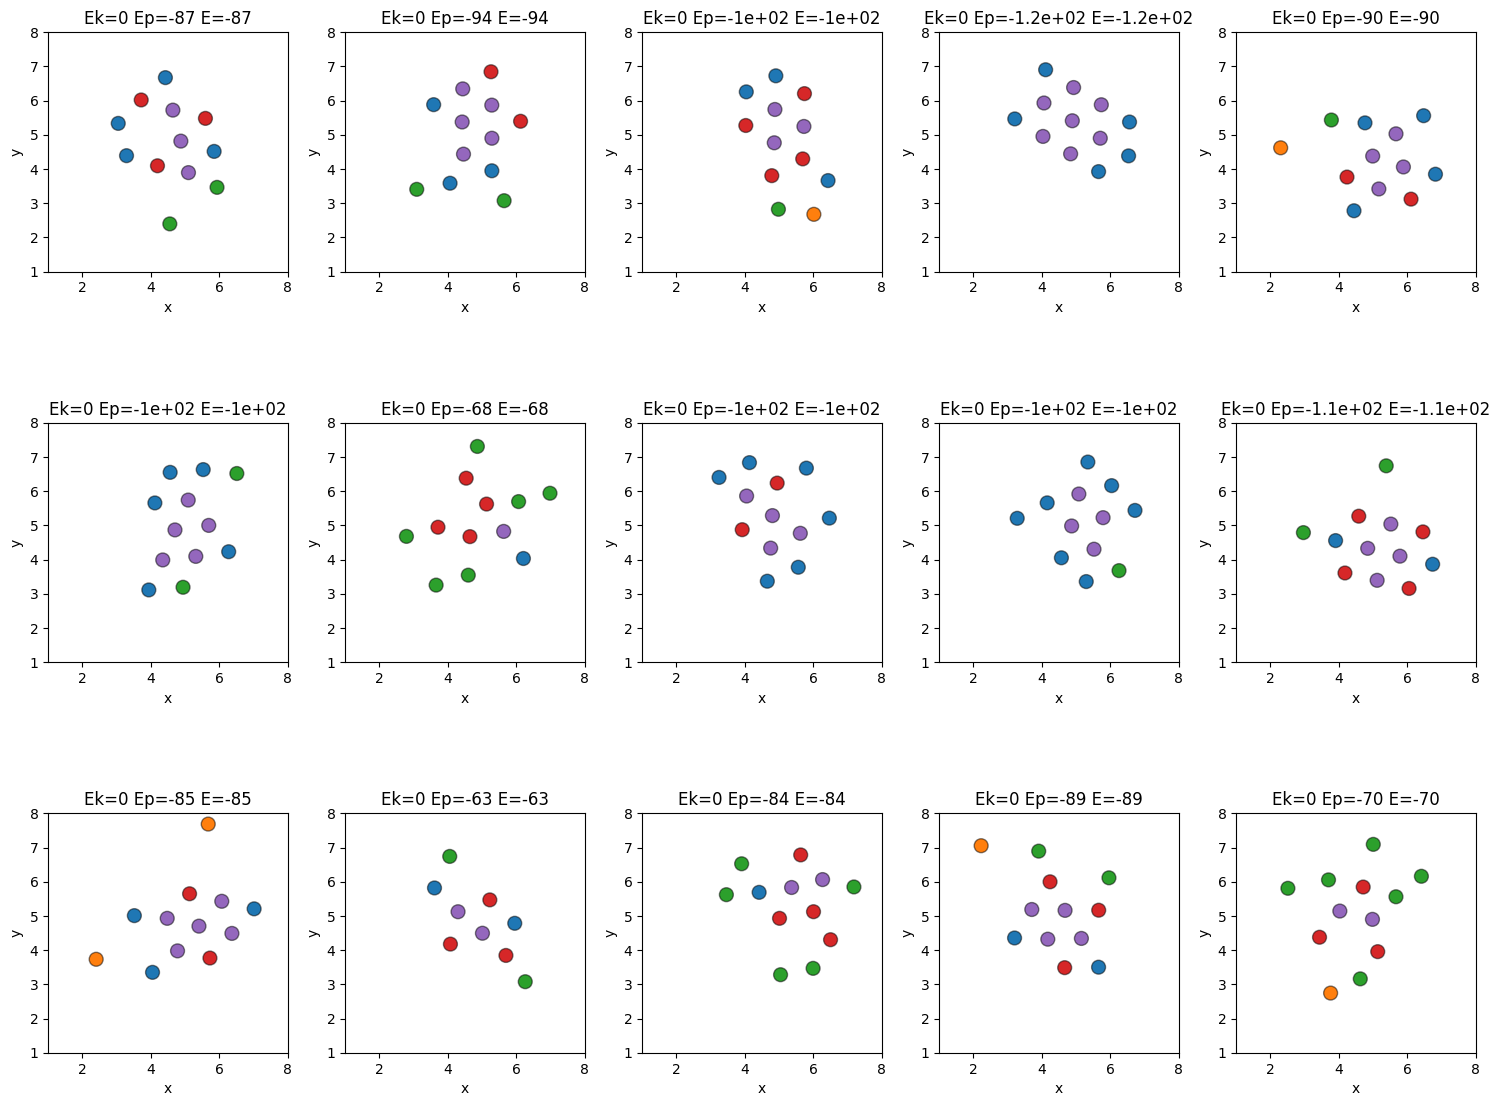

In [179]:
fig, axs = plt.subplots(3,5, figsize = (15,12))

axs = axs.flatten()

for pos, ax, label in zip(positions, axs, labels):
    cluster = AtomicCluster(calc = LennardJones(), pos = pos, labels = label)
    cluster.draw(ax)
    ax.set(xlim = (1,8), ylim = (1,8), aspect='equal', xlabel='x', ylabel='y')
    

fig.tight_layout()

plt.savefig('Figures/Kmeans.png')

In [186]:
# Find descriptors with only N descriptor dimensions:
N_bins = 4
N_descriptors = PD.descriptor(positions[0],N_bins = N_bins)

print(descriptors)
for pos in positions[1:]:
    N_descriptors = np.vstack((N_descriptors, PD.descriptor(pos, N_bins=N_bins)))


print(N_descriptors.shape)


[[1 3 0 4]
 [1 2 2 2]
 [1 3 0 4]
 ...
 [1 2 2 5]
 [1 4 0 6]
 [1 3 0 3]]
(1200, 4)


In [189]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(descriptors)

print(kmeans.labels)

labels = kmeans.labels

labels = labels.reshape(-1,12)

print(labels.shape)

Converged after 3 iterations
[1 2 1 ... 3 0 1]
(100, 12)


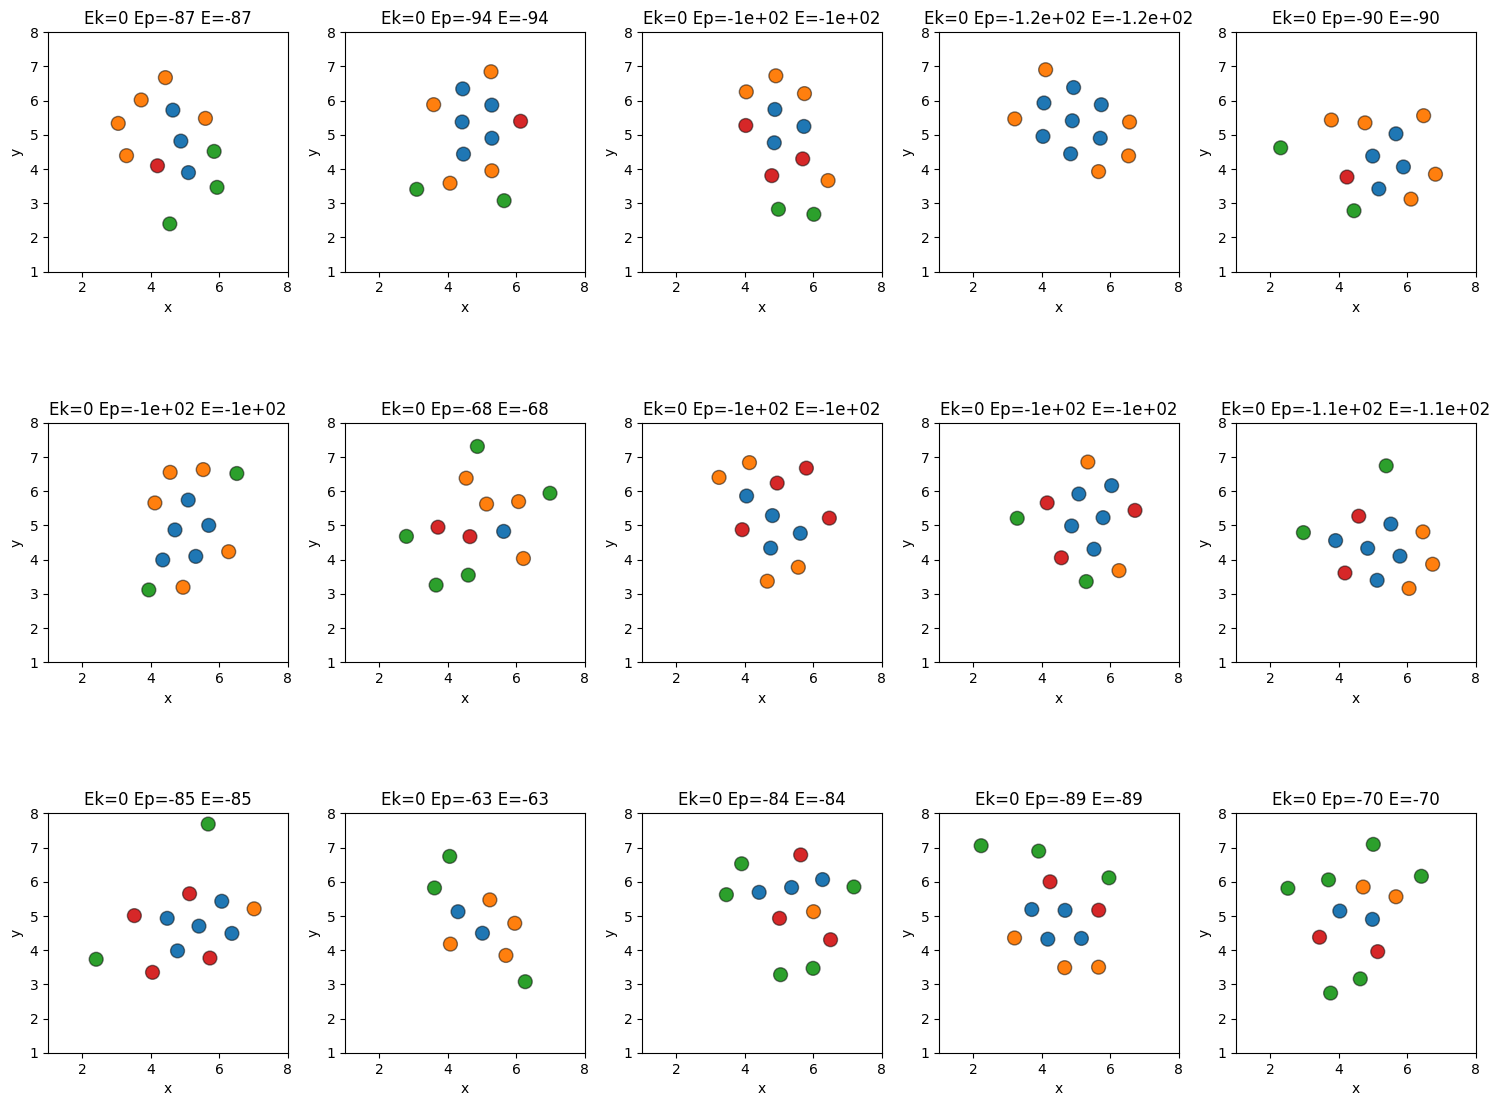

In [190]:
fig, axs = plt.subplots(3,5, figsize = (15,12))

axs = axs.flatten()

for pos, ax, label in zip(positions, axs, labels):
    cluster = AtomicCluster(calc = LennardJones(), pos = pos, labels = label)
    cluster.draw(ax)
    ax.set(xlim = (1,8), ylim = (1,8), aspect='equal', xlabel='x', ylabel='y')
    

fig.tight_layout()

plt.savefig('Figures/Kmeans, Reduced.png')